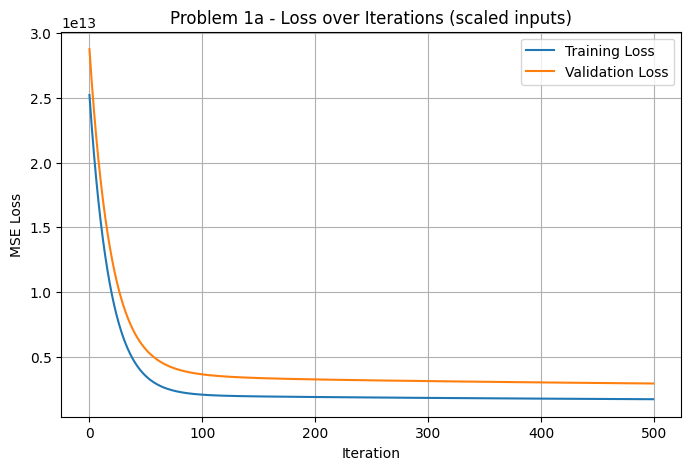

Final theta values for Problem 1a:
[[3003318.74624734]
 [1594462.50758264]
 [1471409.89409207]
 [1121152.70488291]
 [1433685.00959553]
 [1336390.27815637]]


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('Housing.csv')

features_p1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = df[features_p1a].values
y = df[target].values.reshape(-1,1)

X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def add_bias(X):
    return np.hstack([np.ones((X.shape[0],1)), X])

X_train_b = add_bias(X_train)
X_test_b = add_bias(X_test)

theta = np.zeros((X_train_b.shape[1],1))

learning_rate = 0.01
n_iterations = 500

train_losses = []
val_losses = []

for iteration in range(n_iterations):
    predictions = X_train_b.dot(theta)
    errors = predictions - y_train
    gradients = (2 / X_train_b.shape[0]) * X_train_b.T.dot(errors)
    theta -= learning_rate * gradients

    train_loss = np.mean(errors**2)
    val_predictions = X_test_b.dot(theta)
    val_errors = val_predictions - y_test
    val_loss = np.mean(val_errors**2)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Problem 1a - Loss over Iterations (scaled inputs)')
plt.legend()
plt.grid(True)
plt.show()

print("Final theta values for Problem 1a:")
print(theta)


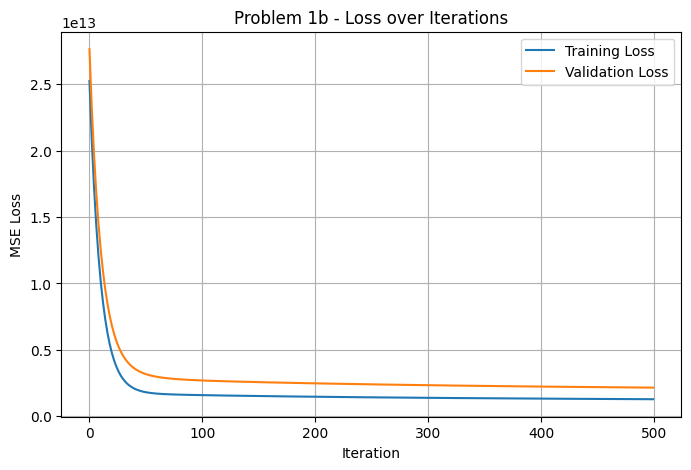

Final theta values for Problem 1b:
[[1861851.65149562]
 [1047781.25114277]
 [1025534.99383141]
 [ 959986.17554213]
 [1097241.67088809]
 [1064368.05940373]
 [ 382874.26694939]
 [ 444569.46746495]
 [ 388358.66802339]
 [1030200.89632255]
 [ 899724.00738434]
 [ 582933.47485313]]


In [31]:
features_p1b = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
    'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
    'parking', 'prefarea'
]
target = 'price'

df_encoded = df.copy()
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    df_encoded[col] = df_encoded[col].map({'yes':1, 'no':0})

X = df_encoded[features_p1b].values
y = df_encoded[target].values.reshape(-1,1)

X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def add_bias(X):
    return np.hstack([np.ones((X.shape[0],1)), X])

X_train_b = add_bias(X_train)
X_test_b = add_bias(X_test)

theta = np.zeros((X_train_b.shape[1],1))
learning_rate = 0.01
n_iterations = 500

train_losses = []
val_losses = []

for iteration in range(n_iterations):
    predictions = X_train_b.dot(theta)
    errors = predictions - y_train
    gradients = (2 / X_train_b.shape[0]) * X_train_b.T.dot(errors)
    theta -= learning_rate * gradients

    train_loss = np.mean(errors**2)
    val_predictions = X_test_b.dot(theta)
    val_errors = val_predictions - y_test
    val_loss = np.mean(val_errors**2)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Problem 1b - Loss over Iterations')
plt.legend()
plt.grid(True)
plt.show()

print("Final theta values for Problem 1b:")
print(theta)


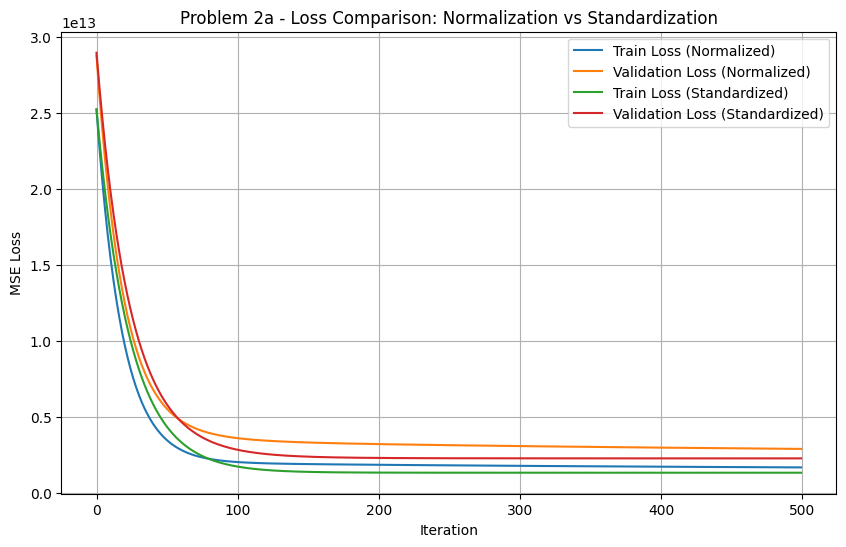

Theta (Normalization): [3003318.74624734 1594462.50758264 1471409.89409207 1121152.70488291
 1433685.00959553 1336390.27815637]
Theta (Standardization): [4706334.30481156  679790.11348611  113839.3501635   565003.70716543
  423858.62690742  288567.48258383]


In [16]:
features_p2a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = df[features_p2a].values
y = df[target].values.reshape(-1,1)

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def scale_inputs(X_train, X_test, method="normalize"):
    if method=="normalize":
        min_ = X_train.min(axis=0)
        max_ = X_train.max(axis=0)
        X_train_s = (X_train - min_) / (max_ - min_)
        X_test_s = (X_test - min_) / (max_ - min_)
    elif method=="standardize":
        mean_ = X_train.mean(axis=0)
        std_ = X_train.std(axis=0)
        X_train_s = (X_train - mean_) / std_
        X_test_s = (X_test - mean_) / std_
    else:
        raise ValueError("Invalid scaling method")
    return X_train_s, X_test_s

def add_bias(X):
    return np.hstack([np.ones((X.shape[0],1)), X])

def run_gradient_descent(X_train, X_test, y_train, y_test, learning_rate=0.01, n_iterations=500):
    X_train_b = add_bias(X_train)
    X_test_b = add_bias(X_test)
    theta = np.zeros((X_train_b.shape[1],1))
    train_losses = []
    val_losses = []
    for iteration in range(n_iterations):
        predictions = X_train_b.dot(theta)
        errors = predictions - y_train
        gradients = (2 / X_train_b.shape[0]) * X_train_b.T.dot(errors)
        theta -= learning_rate * gradients

        train_loss = np.mean(errors**2)
        val_predictions = X_test_b.dot(theta)
        val_errors = val_predictions - y_test
        val_loss = np.mean(val_errors**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
    return train_losses, val_losses, theta

X_train_norm, X_test_norm = scale_inputs(X_train_raw, X_test_raw, method="normalize")
train_losses_norm, val_losses_norm, theta_norm = run_gradient_descent(X_train_norm, X_test_norm, y_train, y_test)

X_train_std, X_test_std = scale_inputs(X_train_raw, X_test_raw, method="standardize")
train_losses_std, val_losses_std, theta_std = run_gradient_descent(X_train_std, X_test_std, y_train, y_test)

plt.figure(figsize=(10,6))
plt.plot(train_losses_norm, label="Train Loss (Normalized)")
plt.plot(val_losses_norm, label="Validation Loss (Normalized)")
plt.plot(train_losses_std, label="Train Loss (Standardized)")
plt.plot(val_losses_std, label="Validation Loss (Standardized)")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Problem 2a - Loss Comparison: Normalization vs Standardization")
plt.legend()
plt.grid(True)
plt.show()

print("Theta (Normalization):", theta_norm.flatten())
print("Theta (Standardization):", theta_std.flatten())

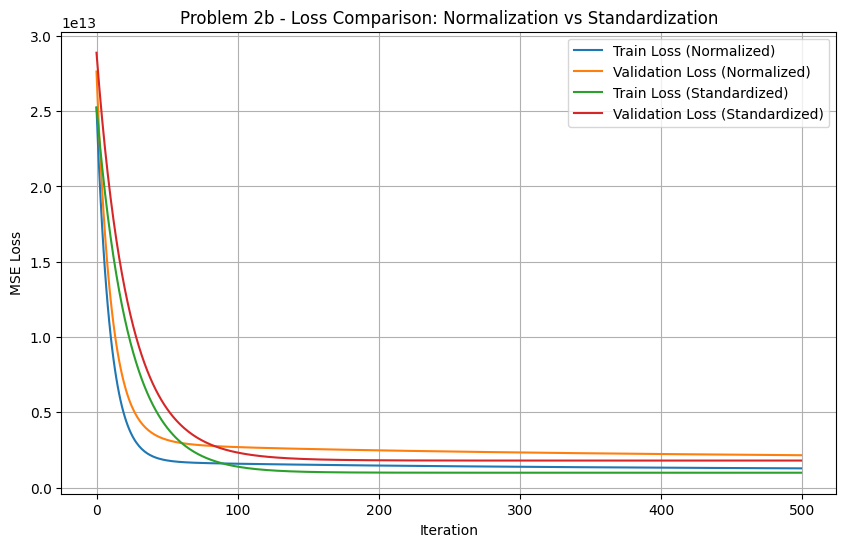

Theta (Normalization): [1861851.65149562 1047781.25114277 1025534.99383141  959986.17554213
 1097241.67088809 1064368.05940373  382874.26694939  444569.46746495
  388358.66802339 1030200.89632255  899724.00738434  582933.47485313]
Theta (Standardization): [4706334.30481156  522098.83380923   60637.34282672  528895.85613027
  363399.15271775  145039.23219616   94711.6641396   206457.31764683
  156143.65631317  373871.2471379   211385.3686979   269576.47400393]


In [17]:
features_p2b = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
    'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
    'parking', 'prefarea'
]
target = 'price'

df_encoded = df.copy()
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    df_encoded[col] = df_encoded[col].map({'yes':1, 'no':0})

X = df_encoded[features_p2b].values
y = df_encoded[target].values.reshape(-1,1)

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def scale_inputs(X_train, X_test, method="normalize"):
    if method=="normalize":
        min_ = X_train.min(axis=0)
        max_ = X_train.max(axis=0)
        X_train_s = (X_train - min_) / (max_ - min_)
        X_test_s = (X_test - min_) / (max_ - min_)
    elif method=="standardize":
        mean_ = X_train.mean(axis=0)
        std_ = X_train.std(axis=0)
        X_train_s = (X_train - mean_) / std_
        X_test_s = (X_test - mean_) / std_
    else:
        raise ValueError("Invalid scaling method")
    return X_train_s, X_test_s

def add_bias(X):
    return np.hstack([np.ones((X.shape[0],1)), X])

def run_gradient_descent(X_train, X_test, y_train, y_test, learning_rate=0.01, n_iterations=500):
    X_train_b = add_bias(X_train)
    X_test_b = add_bias(X_test)
    theta = np.zeros((X_train_b.shape[1],1))
    train_losses = []
    val_losses = []
    for iteration in range(n_iterations):
        predictions = X_train_b.dot(theta)
        errors = predictions - y_train
        gradients = (2 / X_train_b.shape[0]) * X_train_b.T.dot(errors)
        theta -= learning_rate * gradients

        train_loss = np.mean(errors**2)
        val_predictions = X_test_b.dot(theta)
        val_errors = val_predictions - y_test
        val_loss = np.mean(val_errors**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
    return train_losses, val_losses, theta

X_train_norm, X_test_norm = scale_inputs(X_train_raw, X_test_raw, method="normalize")
train_losses_norm, val_losses_norm, theta_norm = run_gradient_descent(
    X_train_norm, X_test_norm, y_train, y_test
)

X_train_std, X_test_std = scale_inputs(X_train_raw, X_test_raw, method="standardize")
train_losses_std, val_losses_std, theta_std = run_gradient_descent(
    X_train_std, X_test_std, y_train, y_test
)

plt.figure(figsize=(10,6))
plt.plot(train_losses_norm, label="Train Loss (Normalized)")
plt.plot(val_losses_norm, label="Validation Loss (Normalized)")
plt.plot(train_losses_std, label="Train Loss (Standardized)")
plt.plot(val_losses_std, label="Validation Loss (Standardized)")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Problem 2b - Loss Comparison: Normalization vs Standardization")
plt.legend()
plt.grid(True)
plt.show()

print("Theta (Normalization):", theta_norm.flatten())
print("Theta (Standardization):", theta_std.flatten())

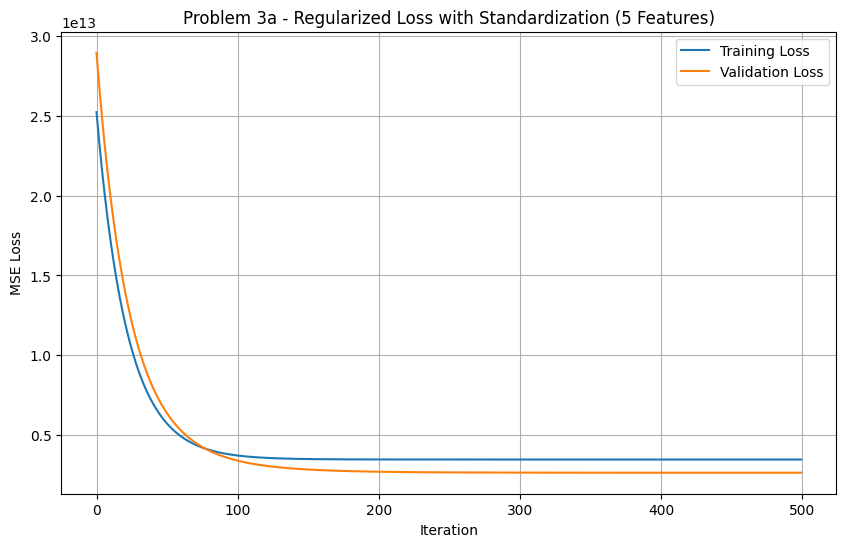

Final theta values (Standardized, Regularized):
[4278598.05673127  625317.29005962  137317.13843913  525173.13352219
  391957.60915554  284432.12025924]


In [32]:
features_p3a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = df[features_p3a].values
y = df[target].values.reshape(-1, 1)

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

mean = X_train_raw.mean(axis=0)
std = X_train_raw.std(axis=0)
X_train_std = (X_train_raw - mean) / std
X_test_std = (X_test_raw - mean) / std

def add_bias(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

def run_gradient_descent_regularized(X_train, X_test, y_train, y_test, learning_rate=0.01, n_iterations=500, lambda_=0.1):
    X_train_b = add_bias(X_train)
    X_test_b = add_bias(X_test)
    theta = np.zeros((X_train_b.shape[1], 1))
    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        predictions = X_train_b.dot(theta)
        errors = predictions - y_train
        gradients = (2 / X_train_b.shape[0]) * X_train_b.T.dot(errors) + 2 * lambda_ * theta
        theta -= learning_rate * gradients

        train_loss = np.mean(errors**2) + lambda_ * np.sum(theta**2)
        val_predictions = X_test_b.dot(theta)
        val_errors = val_predictions - y_test
        val_loss = np.mean(val_errors**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses, theta

train_losses, val_losses, theta = run_gradient_descent_regularized(
    X_train_std, X_test_std, y_train, y_test, learning_rate=0.01, n_iterations=500, lambda_=0.1
)

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Problem 3a - Regularized Loss with Standardization (5 Features)")
plt.legend()
plt.grid(True)
plt.show()

print("Final theta values (Standardized, Regularized):")
print(theta.flatten())

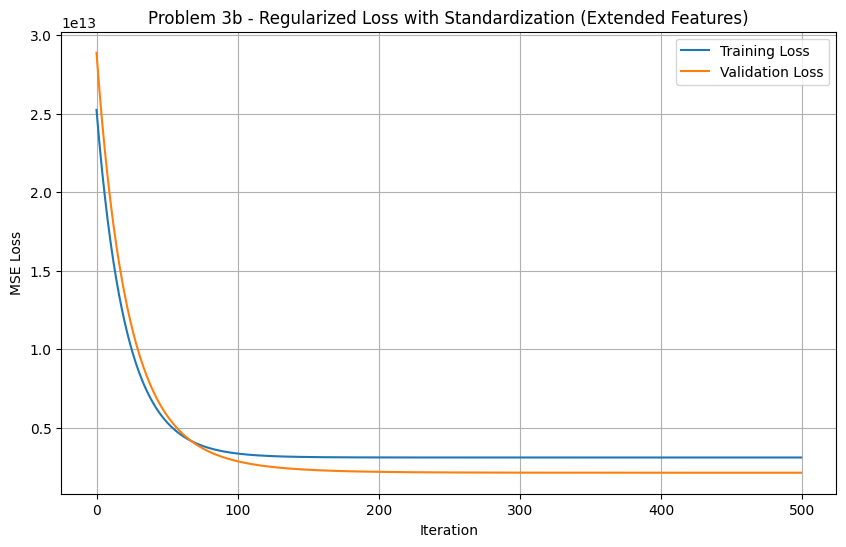

Final theta values (Standardized, Regularized):
[4278598.05673127  482921.71398714   90010.56164446  490066.26204905
  334278.55375147  151600.2268114   106189.00945916  185645.50906669
  140779.16564387  356720.22570344  213247.11074245  252179.68784027]


In [34]:
features_p3b = [
    'area', 'bedrooms', 'bathrooms', 'stories',
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'parking', 'prefarea'
]
target = 'price'

df_encoded = df.copy()
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    df_encoded[col] = df_encoded[col].map({'yes':1, 'no':0})

X = df_encoded[features_p3b].values
y = df_encoded[target].values.reshape(-1, 1)

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

mean = X_train_raw.mean(axis=0)
std = X_train_raw.std(axis=0)
X_train_std = (X_train_raw - mean) / std
X_test_std = (X_test_raw - mean) / std

def add_bias(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

def run_gradient_descent_regularized(X_train, X_test, y_train, y_test, learning_rate=0.01, n_iterations=500, lambda_=0.1):
    X_train_b = add_bias(X_train)
    X_test_b = add_bias(X_test)
    theta = np.zeros((X_train_b.shape[1], 1))
    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        predictions = X_train_b.dot(theta)
        errors = predictions - y_train
        gradients = (2 / X_train_b.shape[0]) * X_train_b.T.dot(errors) + 2 * lambda_ * theta
        theta -= learning_rate * gradients

        train_loss = np.mean(errors**2) + lambda_ * np.sum(theta**2)
        val_predictions = X_test_b.dot(theta)
        val_errors = val_predictions - y_test
        val_loss = np.mean(val_errors**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses, theta

train_losses, val_losses, theta = run_gradient_descent_regularized(
    X_train_std, X_test_std, y_train, y_test, learning_rate=0.01, n_iterations=500, lambda_=0.1
)

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Problem 3b - Regularized Loss with Standardization (Extended Features)")
plt.legend()
plt.grid(True)
plt.show()

print("Final theta values (Standardized, Regularized):")
print(theta.flatten())